## Sim Demo

### Imports

In [34]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
from env.imports import *

In [36]:
import importlib
import data

import models
import sim.sim
import sim.sim_utils
from sim.sim_utils import bytes2human, print_system_usage
from sim.sim import Simulation
from sim.sim_run import single_sim_run

importlib.reload(sim.sim)
importlib.reload(sim.sim_run) 

<module 'sim.sim_run' from '/scratch/asr655/neuroinformatics/GeneEx2Conn/sim/sim_run.py'>

#### Check job specs

In [37]:
print_system_usage()

total = psutil.disk_usage('/').total
print(bytes2human(total))

CPU Usage: 47.7%
RAM Usage: 14.0%
Available RAM: 865.8G
Total RAM: 1007.0G
52.4G


In [38]:
print(os.environ.get("CUDA_VISIBLE_DEVICES"))

# Check available GPUs
print(f"Available GPUs: {torch.cuda.device_count()}")

for i in range(torch.cuda.device_count()):
    print(f"GPU {i}: {torch.cuda.get_device_name(i)} - Memory Allocated: {torch.cuda.memory_allocated(i)/1024**3:.2f} GB")


0
Available GPUs: 1
GPU 0: NVIDIA A100-SXM4-80GB - Memory Allocated: 0.02 GB


In [39]:
print("XGBoost version:", xgboost.__version__)
print("cupy version:", cp.__version__)

GPUtil.getAvailable()

# if a number is seen a GPU is available
GPUtil.getGPUs()

DEVICE_ID_LIST = GPUtil.getFirstAvailable()
DEVICE_ID = DEVICE_ID_LIST[0] # grab first element from list
if DEVICE_ID != None: 
    print('GPU found', DEVICE_ID)
    use_gpu = True

    GPUtil.showUtilization()

XGBoost version: 2.0.3
cupy version: 13.1.0
GPU found 0
| ID | GPU | MEM |
------------------
|  0 |  0% |  1% |


In [40]:
torch.cuda.is_available()

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()

## Simulation tests <a id="sims"></a>

### Model Parameter Counts

#### **Linear Models**
- **PCA Bilinear:** 730  _(27 PCs)_
- **PLS Bilinear:** 101  _(10 PLS components)_
- **Bilinear Low-rank:** 73,800  _(rank 10)_
- **PLS MLP:** 158,993  _(10 PLS components, including PLS projection matrices)_
- **PCA MLP:** 47,873  _(27 PCs, 2-layer)_

---

#### **MLP and SMT Models**

#### 2-Layer Models
- **MLP:** 3,812,609
- **SMT:** 1,399,947
- **MLP w/ CLS:** 3,814,145
- **SMT w/ CLS:** 1,405,579

#### 3-Layer Models
- **MLP:** 7,723,777
- **SMT:** 2,162,315
- **MLP w/ CLS:** 7,726,849
- **SMT w/ CLS:** 2,173,067

---

### Coord MLP Parameter Counts
- **[32]:** 321
- **[64, 32]:** 2,753
- **[128, 64]:** 9,601
- **[256, 128]:** 35,685
- **[512, 256, 128]:** 169,729

Number of components for 95% variance PCA: 27
Number of 1s: 36662, Number of 0s: 171274, Class balance (1s): 0.176
Number of 1s: 17738, Number of 0s: 190198, Class balance (1s): 0.085
X shape: (455, 7380)
X_pca shape: (455, 27)
Y_sc shape: (455, 455)
Y_sc_spectralL shape: (455, 455)
Y_sc_spectralA shape: (455, 456)
Y_fc shape: (455, 455)
Coordinates shape: (455, 3)
Y shape (455, 455)
Network coverage: 100.0% of regions
Network sizes: [113, 113, 113, 116]
feature_name: transcriptome, processing_type: None
features ['transcriptome']
Feature matrix, X, generated... expanding to pairwise dataset


wandb: WARNING Malformed sweep config detected! This may cause your sweep to behave in unexpected ways.
wandb: WARNING To avoid this, please fix the sweep config schema violations below:
wandb: WARNING   Violation 1. Additional properties are not allowed ('best_parameters' was unexpected)


Create sweep with ID: 7ip5fu5a
Sweep URL: https://wandb.ai/alexander-ratzan-new-york-university/gx2conn/sweeps/7ip5fu5a
Initialized sweep with ID: 7ip5fu5a
2
3
4
BEST CONFIG {'input_dim': 14760, 'binarize': False, 'n_components': 10, 'max_iter': 1000, 'scale': True, 'optimize_encoder': False, 'learning_rate': 0.0035, 'batch_size': 512, 'weight_decay': 0.01, 'epochs': 100}
X_train shape: torch.Size([342, 7380])
Y_train shape: torch.Size([342, 342])


  warnings.warn(



Total number of parameters: 147701
Running train evaluation...

=== TRAIN EVALUATION ===
Evaluating 342 regions, 116622 connections


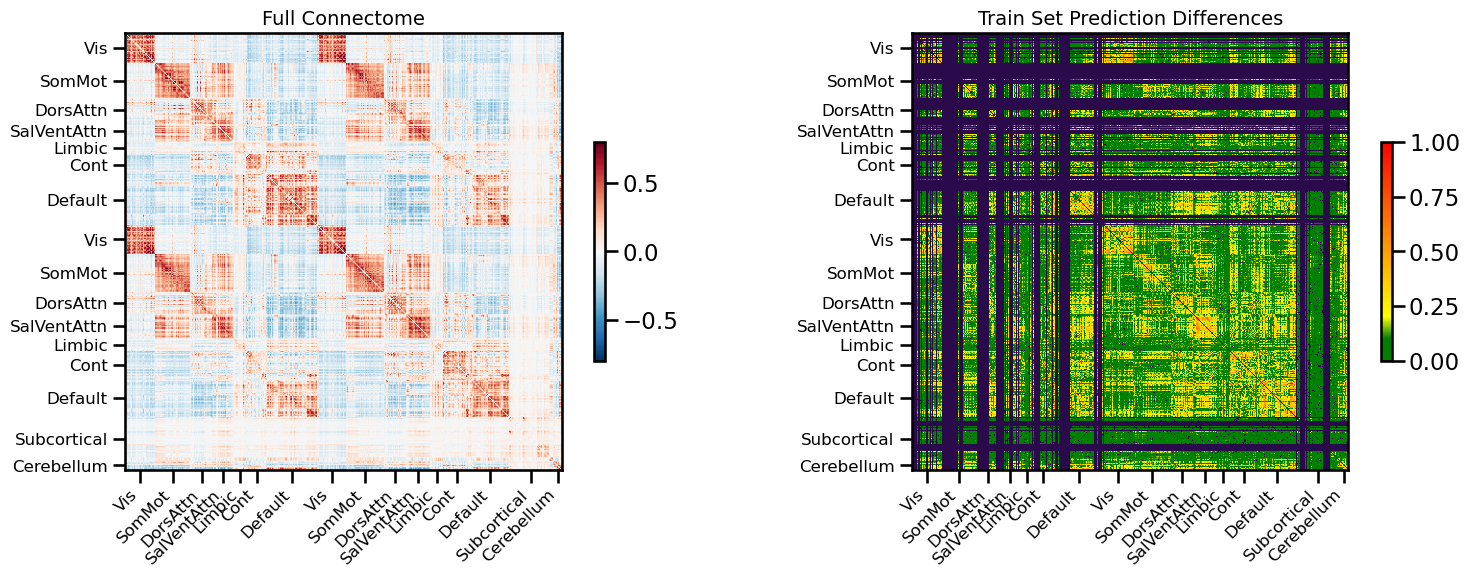

<Figure size 640x480 with 0 Axes>

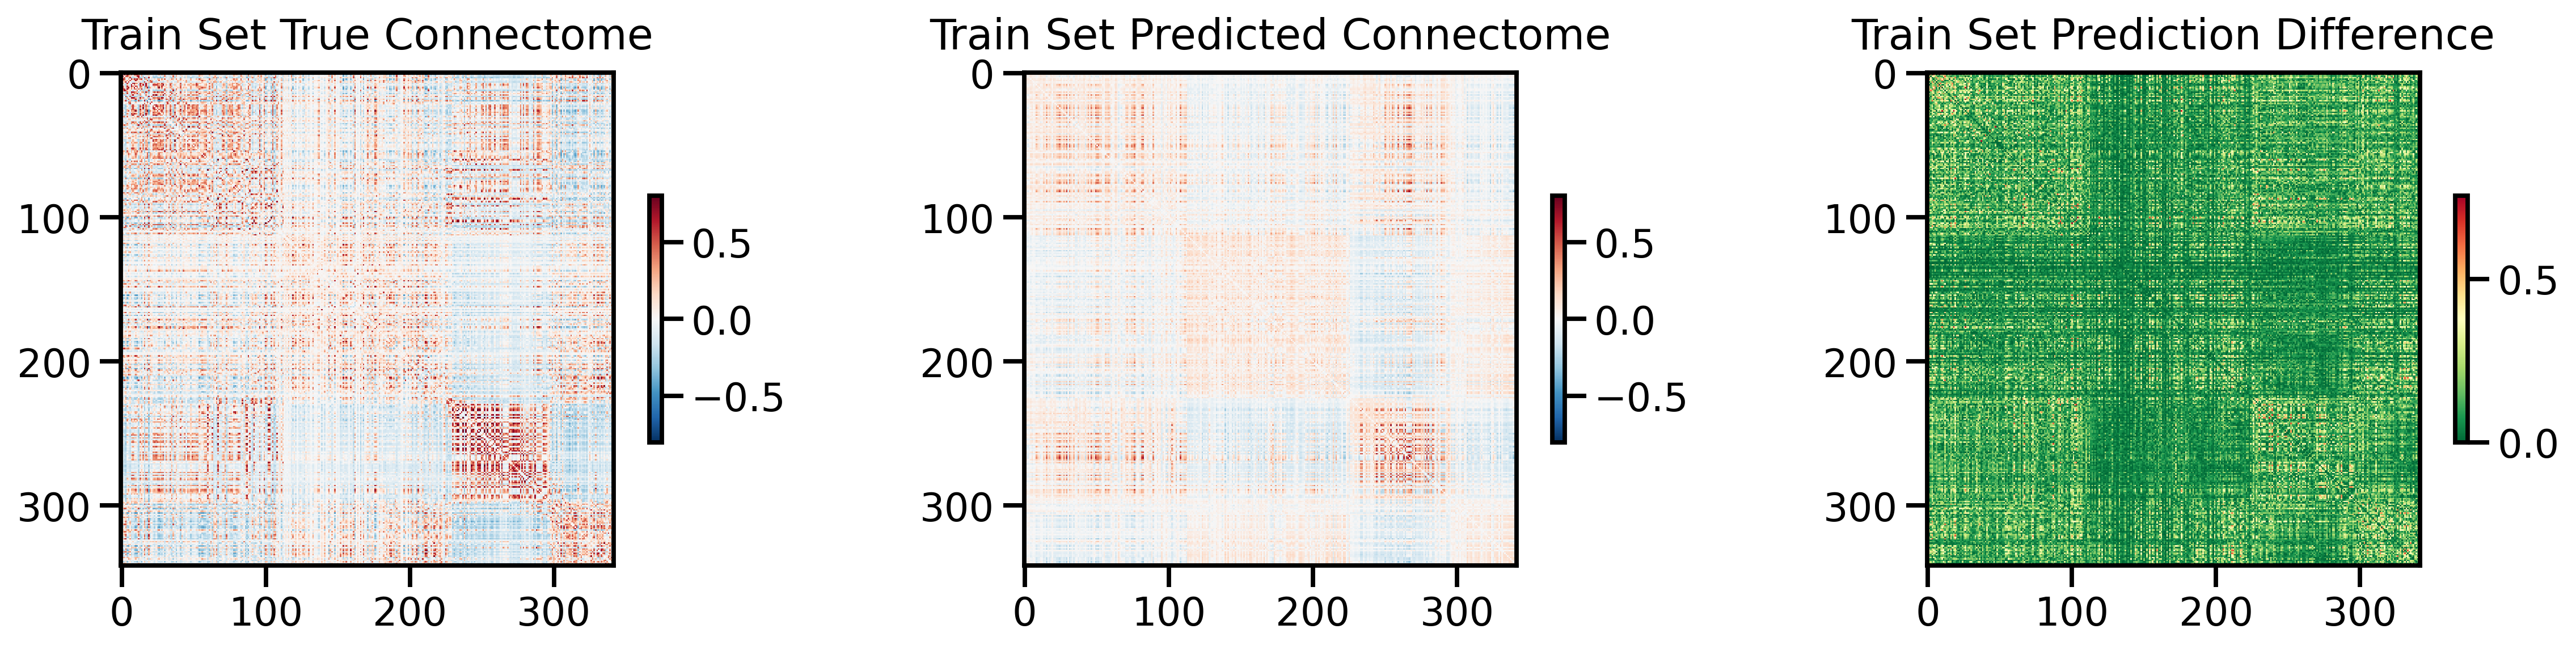

<Figure size 640x480 with 0 Axes>

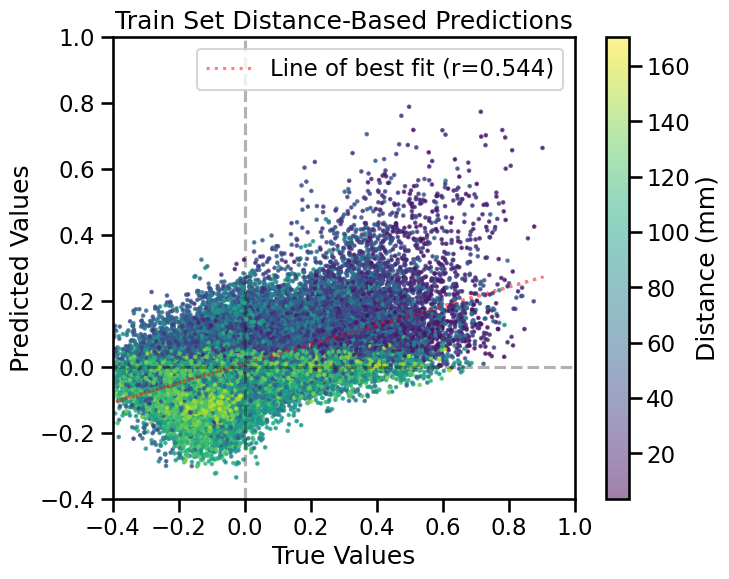

Running test evaluation...

=== TEST EVALUATION ===
Evaluating 113 regions, 12656 connections


<Figure size 640x480 with 0 Axes>

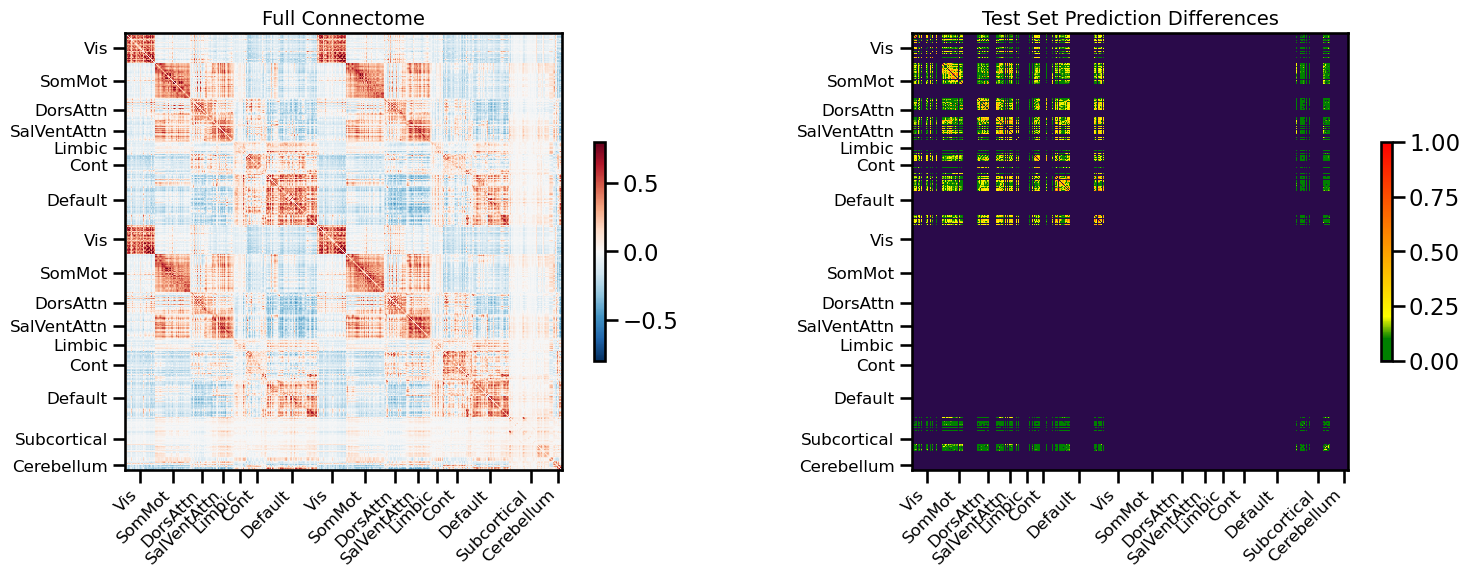

<Figure size 640x480 with 0 Axes>

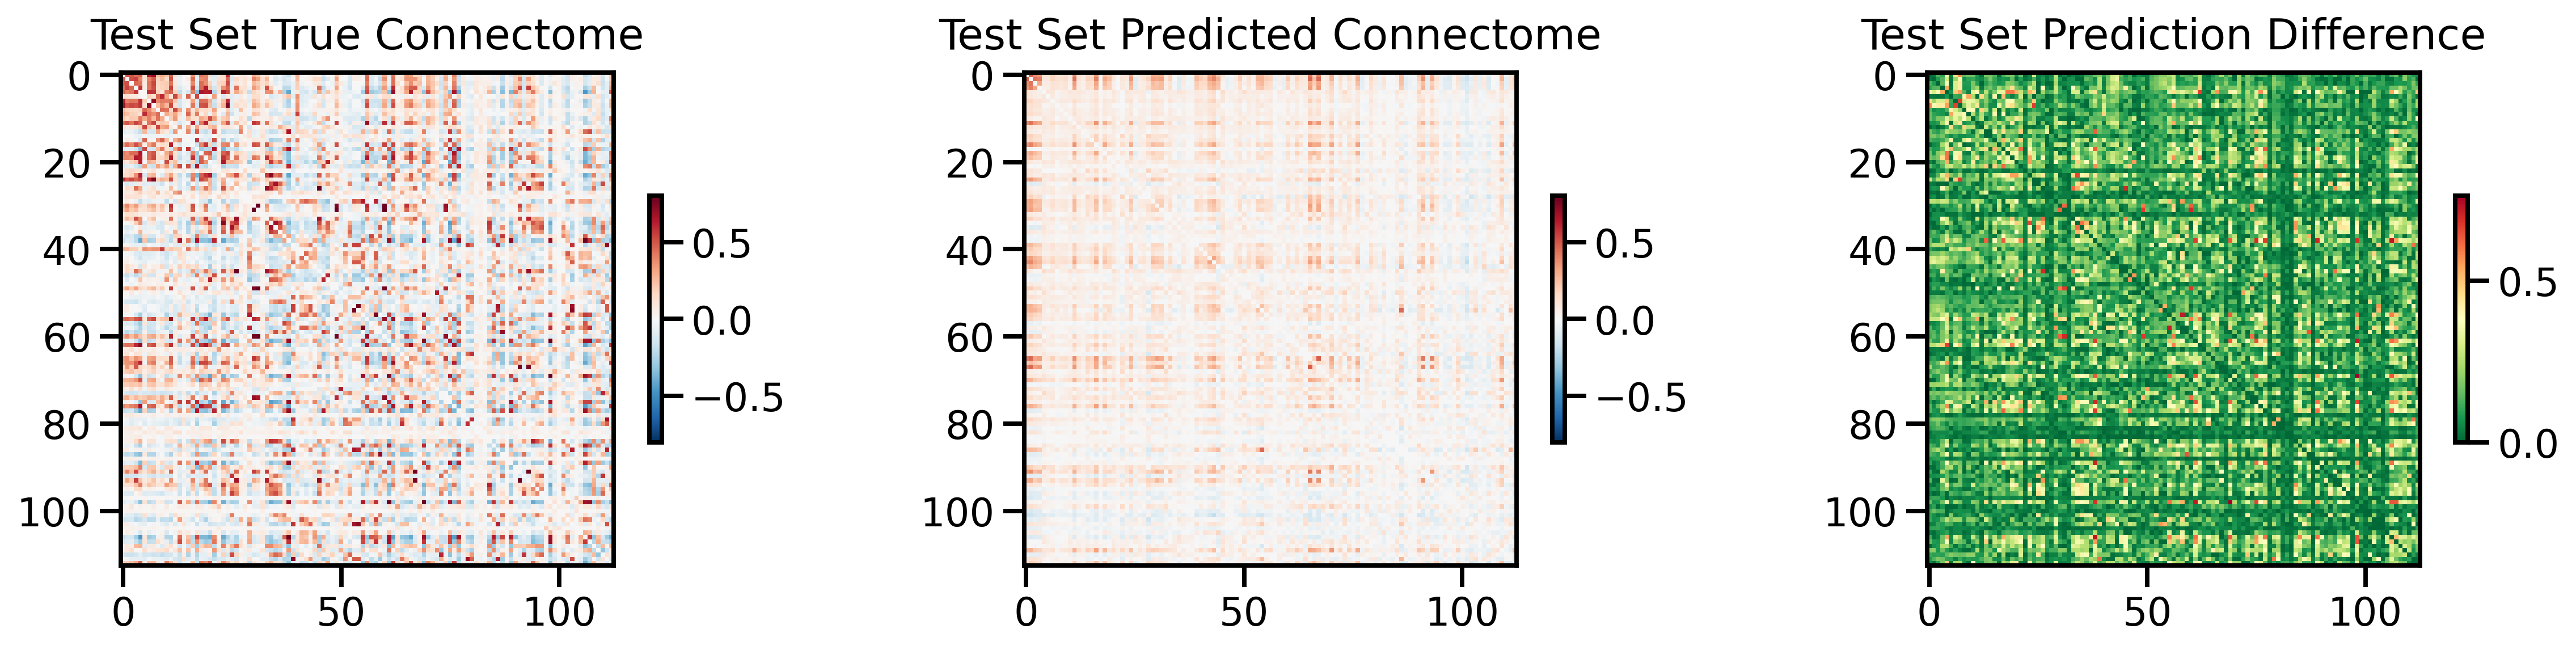

<Figure size 640x480 with 0 Axes>

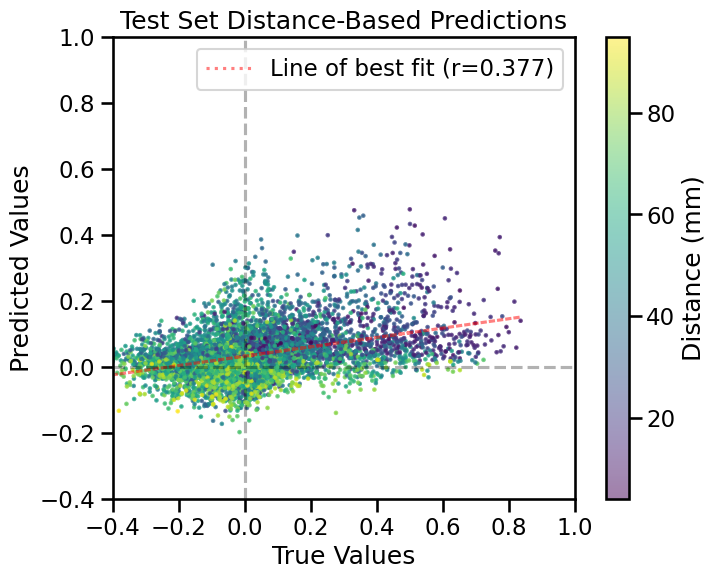

TRAIN METRICS
GLOBAL: mse=0.023534, mae=0.113468, r2=0.2963, pearson_r=0.5445, spearman_r=0.5113, geodesic_distance=30.6468
DISTANCE-BASED: short=0.5574, mid=0.4103, long=0.3587
HEMISPHERIC: left=0.6245, right=0.5053, inter=0.5566
CONNECTION STRENGTH: neg=0.0469, weak=0.4395, pos=0.2420
NETWORK CORRELATIONS:
  NETWORK      INTRA      INTER
  ------------------------------
  Cont          0.2356    0.4029
  Default       0.4123    0.3508
  SalVentAttn    0.3188    0.4531
  Limbic        0.5773    0.3891
  DorsAttn      0.3596    0.4563
  SomMot        0.3490    0.5178
  Vis           0.4005    0.3504
  Subcortical    0.6496    0.4565
  Cerebellum    0.3894    0.2957

TEST METRICS
GLOBAL: mse=0.034345, mae=0.136591, r2=0.1419, pearson_r=0.3771, spearman_r=0.3468, geodesic_distance=19.6406
DISTANCE-BASED: short=0.3989, mid=0.1251
HEMISPHERIC: left=0.3771
CONNECTION STRENGTH: neg=0.0952, weak=0.2693, pos=0.0901
NETWORK CORRELATIONS:
  NETWORK      INTRA      INTER
  -----------------------

0

<Figure size 640x480 with 0 Axes>

In [43]:
single_sim_run(
              feature_type=[{'transcriptome': None}],
              use_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=False,
              parcellation='S400',
              hemisphere='both',
              connectome_target='FC',
              binarize=False,
              impute_strategy='mirror_interpolate',
              sort_genes='refgenome',
              gene_list='0.2',
              cv_type='spatial',
              random_seed=1,
              search_method=('wandb', 'mse', 3),
              track_wandb=False,
              skip_cv=True,
              model_type='pls_bilineardecoder',
              use_gpu=True, 
              null_model='none',
              use_folds=[0]
              )

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()

# Clear CPU memory
gc.collect()